In [33]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [6]:
hirthi = pd.read_csv(r'C:\Users\HP\Downloads\Churn_Modelling.csv')

In [7]:
hirthi

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
hirthi.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
X=hirthi.iloc[:, 3:13]
y=hirthi.iloc[:, 13]

In [11]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
Geography=pd.get_dummies(X["Geography"], drop_first=True)
gender=pd.get_dummies(X["Gender"], drop_first=True)

In [13]:
X=pd.concat([X,Geography,gender], axis=1)

In [14]:
X=X.drop(['Geography','Gender'], axis=1)

In [15]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [16]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU , PReLU , ELU
from keras.layers import Dropout 

In [19]:
classifier = Sequential()

In [20]:
classifier.add(Dense(units = 6 , kernel_initializer='he_uniform' ,  activation = 'relu' , input_dim = 11))

In [21]:
classifier.add(Dense(units = 6 , kernel_initializer='he_uniform' ,  activation = 'relu' ))

In [24]:
classifier.add(Dense(units = 1 , kernel_initializer='glorot_uniform' ,  activation = 'sigmoid' ))

In [28]:
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics =['accuracy'])

In [30]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 3s 4ms/step - loss: 0.5063 - accuracy: 0.7961 - val_loss: 0.4836 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4727 - accuracy: 0.7936 - val_loss: 0.4587 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4384 - accuracy: 0.7968 - val_loss: 0.4422 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4222 - accuracy: 0.8030 - val_loss: 0.4324 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4250 - accuracy: 0.7970 - val_loss: 0.4276 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4260 - accuracy: 0.7879 - val_loss: 0.4239 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4174 - accuracy: 0.7980 - val_loss: 0.4214 - val_accuracy: 0.8031

In [31]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


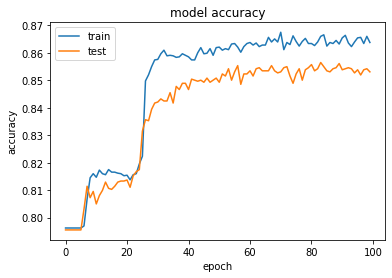

In [36]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


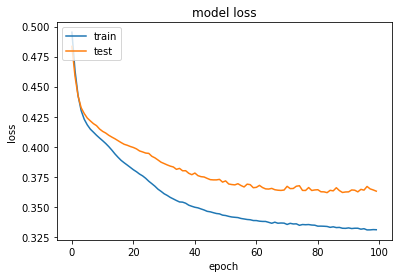

In [37]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [38]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [40]:
cm

array([[1495,  100],
       [ 195,  210]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [42]:
score

0.8525